# DATA PRE-PROCESSING AND FEATURE ENGINEERING

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### fill all the missing values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Age.mean()

29.69911764705882

In [8]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [9]:
df.Age=df.Age.fillna(df.Age.mean())
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])
df=df.drop(columns=['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Check and handle outliers in 3 columns

In [12]:
import seaborn as sns

<Axes: >

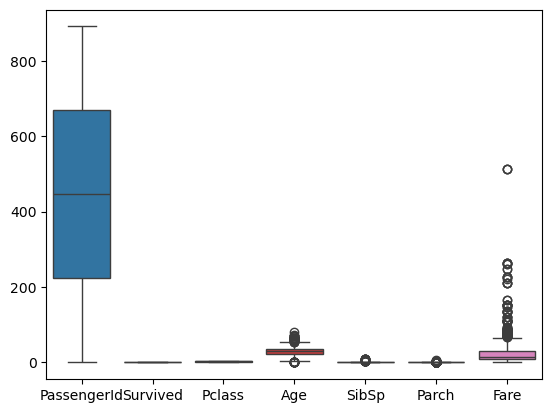

In [13]:
# check the outliers
sns.boxplot(df)

In [14]:
# check the distribution
df.SibSp.skew()

3.6953517271630565

In [15]:
df.Parch.skew()

2.7491170471010933

In [16]:
df.Fare.skew()

4.787316519674893

In [17]:
# SibSp
from scipy.stats import zscore

In [18]:
Q1=np.percentile(df.SibSp,25,method='midpoint')
Q3=np.percentile(df.SibSp,75,method='midpoint')
IQR=Q3-Q1
IQR

1.0

In [19]:
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
print(low)
print(upp)

-1.5
2.5


In [20]:
outliers=[]
for i in df.SibSp:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [21]:
df.SibSp=df.SibSp.clip(lower=low,upper=upp)

In [22]:
outliers=[]
for i in df.SibSp:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers

[]

<Axes: >

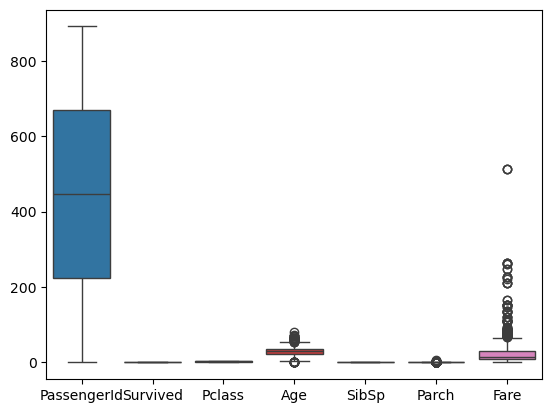

In [23]:
sns.boxplot(df)

<Axes: >

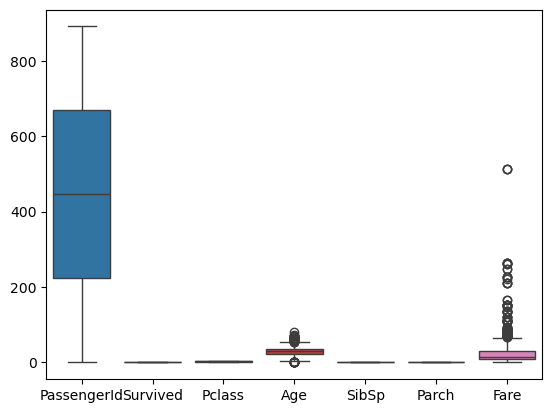

In [24]:
# Parch
Q1=np.percentile(df.Parch,25,method='midpoint')
Q3=np.percentile(df.Parch,75,method='midpoint')
IQR=Q3-Q1
IQR
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
# print(low)
# print(upp)
outliers=[]
for i in df.Parch:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers
df.Parch=df.Parch.clip(lower=low,upper=upp)
outliers=[]
for i in df.Parch:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers
sns.boxplot(df)

<Axes: >

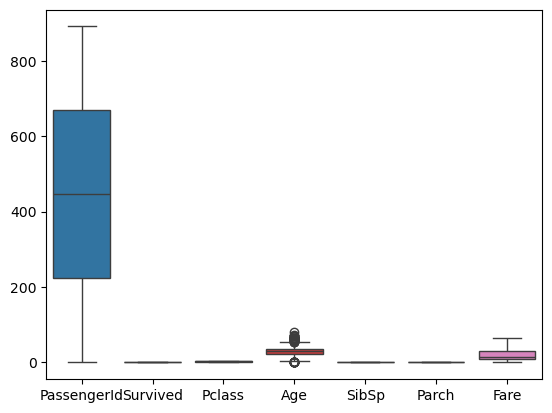

In [25]:
# Fare
Q1=np.percentile(df.Fare,25,method='midpoint')
Q3=np.percentile(df.Fare,75,method='midpoint')
IQR=Q3-Q1
IQR
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
# print(low)
# print(upp)
outliers=[]
for i in df.Fare:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers
df.Fare=df.Fare.clip(lower=low,upper=upp)
outliers=[]
for i in df.Fare:
    if ((i<low)or(i>upp)):
        outliers.append(i)
outliers
sns.boxplot(df)

### Encoding,Scaling/Normalization

In [27]:
# Encoding
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
df.Sex=le.fit_transform(df.Sex).astype(int)
df.Embarked=le.fit_transform(df.Embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1.0,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,0,PC 17599,65.6344,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0.0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1.0,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0.0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0.0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0.0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1.0,0,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0.0,0,111369,30.0000,0


In [30]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()
df[['Age', 'Fare']] = sc.fit_transform(df[['Age', 'Fare']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1.0,0,A/5 21171,-0.820552,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1.0,0,PC 17599,2.031623,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0.0,0,STON/O2. 3101282,-0.787578,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1.0,0,113803,1.419297,2
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0.0,0,373450,-0.781471,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,-0.207709,0.0,0,211536,-0.539655,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,-0.823344,0.0,0,112053,0.290823,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.000000,1.0,0,W./C. 6607,-0.029155,2
889,890,1,1,"Behr, Mr. Karl Howell",1,-0.284663,0.0,0,111369,0.290823,0
